# SECTION 01. 머신러닝으로 AI 모델링하기

## 2. 선형회귀(Linear Regression) 

### 2)  선형회귀 실습하기

#### (1) 데이터 구성하기

In [1]:
# 라이브러리 불러오기 (numpy, matplotlib)
import numpy as np
import matplotlib.pyplot as plt

# 렌덤 시드 고정
np.random.seed(2023)

In [2]:
# x는 1~10, y = 4*x+7인 학습 데이터 생성하기
x = []
y = []
for i in range(1,11): 
    x.append(i)
    y.append(4*i+7)

In [3]:
# 데이터 확인하기
print('x : ', x) 
print('y : ', y) 

x :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y :  [11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


#### (2) 선형회귀 학습 하기

In [4]:
# 선형회귀 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
# 선형회귀 생성하기
reg = LinearRegression()

In [5]:
# 학습을 위해 1행10열 구성 데이터를 10행 1열로 변경하기
x = np.array(x).reshape(-1, 1)
# 데이터 확인하기
print("학습 데이터 확인")
print('x :' ,x)
print('x.shape : ', x.shape)

학습 데이터 확인
x : [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
x.shape :  (10, 1)


In [6]:
# 학습하기
reg.fit(x,y)

LinearRegression()

In [7]:
# 산식 추정을 위한 기울기(coef) 및 절편(intercept) 확인하기
print(f'''기울기 및 절편 확인 coef = {reg.coef_}, intercept = {reg.intercept_} ''')

기울기 및 절편 확인 coef = [4.], intercept = 7.000000000000011 


In [8]:
# 절편과 기울기로 결과를 수동 계산하여 비교값 생성하기
coef_intercept = x * reg.coef_[0] + reg.intercept_
print("계산 결과")
print(coef_intercept)

계산 결과
[[11.]
 [15.]
 [19.]
 [23.]
 [27.]
 [31.]
 [35.]
 [39.]
 [43.]
 [47.]]


#### (3) 결과 비교를 위해 그래프 그리기

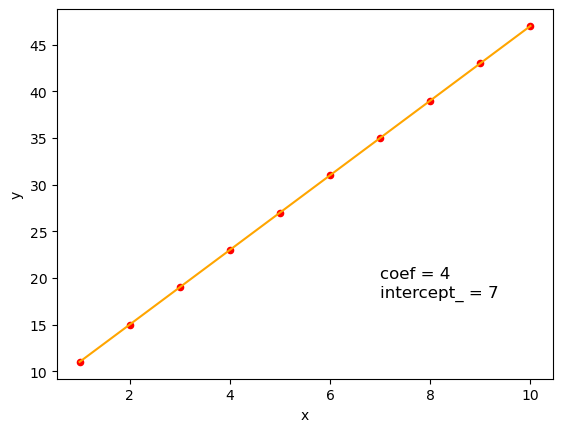

In [9]:
# scatter plot 그래프그리기
plt.scatter(x, y, color = 'r', s = 20)
# 선 그래프 그리기
plt.plot(x, coef_intercept, color = 'orange')
# coef 값 그래프 내에 텍스트 삽입하기
plt.text(7, 20, 'coef = %.0f'%reg.coef_[0], size = 12)
# intercept 값 그래프 내에 텍스트 삽입하기
plt.text(7, 18, 'intercept_ = %.0f'%reg.intercept_, size = 12)
# x축(가로) label 설정하기
plt.xlabel('x')
# y축(세로) label 설정하기
plt.ylabel('y')
plt.show()

### 3) 사례기반 선형회귀 모델링

#### (1) 데이터 전처리하기

In [10]:
# 판다스 라이브러리 불러오기
import pandas as pd 

In [11]:
# 데이터 불러오기
df = pd.read_csv("국민건강보험공단_건강검진정보_20211229.CSV", encoding='cp949')

In [12]:
# pandas display 옵션 조정을 통해 View 범위 확장하기
pd.set_option('display.max_columns', None) # display 옵션을 통한 전체 열 확장

In [13]:
# 데이터 확인하기 (상위 5개)
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [14]:
# 가설을 참고하여 데이터 일부 삭제하기 
# 시력, 청력, 치아 관련 칼럼은 관계없다는 가정으로 열 제거하기
df.drop(["치아우식증유무", '치석','시력(좌)', '시력(우)', '청력(좌)',  '청력(우)', '구강검진 수검여부'], axis=1, inplace=True)

In [15]:
# 기준년도 칼럼 확인하기 (모두 '2020' 동일 값이므로 '기준년도' 칼럼 삭제)
print("기준년도 칼럼 확인")
df.기준년도.value_counts() 

기준년도 칼럼 확인


2020    1000000
Name: 기준년도, dtype: int64

In [16]:
# 가입자 일련번호 칼럼 확인하기 (모두 unique한 값으로 확인되어 '가입자 일련번호' 컬럼 삭제)
print("가입자 일련번호 칼럼 확인")
df["가입자 일련번호"].value_counts() 

가입자 일련번호 칼럼 확인


1          1
666658     1
666660     1
666661     1
666662     1
          ..
333338     1
333339     1
333340     1
333341     1
1000000    1
Name: 가입자 일련번호, Length: 1000000, dtype: int64

In [17]:
# 성별코드 칼럼 확인하기
print("성별코드 칼럼 확인")
df.성별코드.value_counts()

성별코드 칼럼 확인


1    510689
2    489311
Name: 성별코드, dtype: int64

In [18]:
# 불필요한 데이터 삭제하기
df.drop(["기준년도", '가입자 일련번호', '데이터 공개일자', '성별코드', '시도코드'], axis=1, inplace=True)

In [19]:
# 별도의 test 데이터 추출하기
test = df[df['LDL 콜레스테롤'].isnull()]

In [20]:
# NaN 데이터 행 단위로 삭제하기
train = df.dropna(axis=0)

In [21]:
# 학습 데이터 확인하기
print("학습 데이터 확인")
train.head(1)

학습 데이터 확인


,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0


In [22]:
# 정답 데이터 생성하기
y = train['LDL 콜레스테롤']

In [23]:
# 학습 데이터 생성하기
x = train.drop('LDL 콜레스테롤', axis=1)

In [24]:
# validation set 추출을 위한 train_test_split 라이브러리 불러오기
from sklearn.model_selection import train_test_split

In [25]:
# scikit learn 예시 코드 비율 대로 불러오기
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [26]:
# 학습/검증 데이터 확인하기
print("학습/검증 데이터 확인")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

학습/검증 데이터 확인
(262749, 18) (262749,) (129415, 18) (129415,)


#### (2) 선형회귀 학습 및 추론하기

In [27]:
# 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
# 모델 생성하기
reg = LinearRegression()
# 학습하기
reg.fit(X_train,y_train)

LinearRegression()

In [29]:
# 기울기와 절편 확인하기
print(f'''기울기 및 절편 확인 
기울기확인 coef = {reg.coef_}
절편확인 intercept = {reg.intercept_}''')

기울기 및 절편 확인 
기울기확인 coef = [ 0.10940698  0.01482723  0.03846911  0.04390587 -0.01075239 -0.00400628
 -0.00250987  0.96960416 -0.17471532 -0.7285143   0.14793707  0.02093034
  0.30343003 -0.01334047  0.01410607 -0.00855896  0.26395722 -0.70237274]
절편확인 intercept = -22.424253230417577


In [30]:
# 각각 데이터에 대해 가중치(or 회귀계수) 확인하기
print("전체에 대해서 가중치 확인")
for index ,columns in enumerate(X_train.columns):
    print(f"{columns} = {reg.coef_[index]}")

전체에 대해서 가중치 확인
연령대 코드(5세단위) = 0.10940697813903975
신장(5Cm단위) = 0.014827231815311145
체중(5Kg 단위) = 0.03846910648118471
허리둘레 = 0.04390587116959737
수축기 혈압 = -0.010752389060189287
이완기 혈압 = -0.004006282687844597
식전혈당(공복혈당) = -0.002509871758126584
총 콜레스테롤 = 0.9696041571709917
트리글리세라이드 = -0.1747153218787
HDL 콜레스테롤 = -0.728514295030803
혈색소 = 0.14793707336766196
요단백 = 0.020930335819269587
혈청크레아티닌 = 0.30343002949216025
(혈청지오티)AST = -0.01334047446764556
(혈청지오티)ALT = 0.014106072133288093
감마 지티피 = -0.008558956086861268
흡연상태 = 0.2639572180775779
음주여부 = -0.7023727367515162


#### (3) 예측을 통한 최종 검증하기

In [31]:
# 예측하기
y_pred = reg.predict(X_test)

In [32]:
# 결과 검증을 위해 MSE 라이브러리 불러오기
# 최종적으로는 RMSE를 사용하기
from sklearn.metrics import mean_squared_error

In [33]:
# mse 라이브러리 에서 RMSE 는 squared 옵션을 False로 설정하기
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [34]:
# 주요 Feature 삭제 전 rmse 확인하기
print(f'''주요 Feature 삭제 전 rmse = {round(rmse,3)}''')

주요 Feature 삭제 전 rmse = 8.127


#### (4) 가중치의 의미 확인하기

In [35]:
# 주요 Feature 삭제를 위해 칼럼명 재확인하기
train.columns

Index(['연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '수축기 혈압', '이완기 혈압',
       '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부'],
      dtype='object')

In [36]:
# 주요 Feature 삭제하기
x = x.drop(['총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤'],axis = 1)

In [37]:
# scikit learn 예시 코드 비율 대로 불러오기
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

#### (5) 선형회귀 모델 재학습하기

In [38]:
# 선형회귀 재생성 및 학습하기
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
# 각각 데이터에 대해 가중치(or 회귀계수) 확인하기
print(f'''coef
{lr.coef_}
intercept
{lr.intercept_}''')

coef
[-2.42029175e+00 -3.33193684e-01 -2.06625915e-04 -6.04430610e-02
 -1.12762074e-01  2.60023059e-01 -1.40142661e-01  3.98600794e+00
 -1.43222741e+00 -3.09969695e-01 -5.96480461e-02  4.51315922e-02
 -2.61611789e-02 -3.08419949e+00 -1.22509065e+00]
intercept
164.2290231811985


#### (6) 가중치 비교하기

In [40]:
# 검증 데이터로 예측하기
y_pred = lr.predict(X_test)

In [41]:
# 각각 데이터에 대해 가중치(또는 회귀계수) 확인하기
print("가중치 확인")
for index ,columns in enumerate(X_train.columns):
    print(f"{columns} = {reg.coef_[index]}")

가중치 확인
연령대 코드(5세단위) = 0.10940697813903975
신장(5Cm단위) = 0.014827231815311145
체중(5Kg 단위) = 0.03846910648118471
허리둘레 = 0.04390587116959737
수축기 혈압 = -0.010752389060189287
이완기 혈압 = -0.004006282687844597
식전혈당(공복혈당) = -0.002509871758126584
혈색소 = 0.9696041571709917
요단백 = -0.1747153218787
혈청크레아티닌 = -0.728514295030803
(혈청지오티)AST = 0.14793707336766196
(혈청지오티)ALT = 0.020930335819269587
감마 지티피 = 0.30343002949216025
흡연상태 = -0.01334047446764556
음주여부 = 0.014106072133288093


In [42]:
# 주요 Feature 삭제 후 RMSE 확인하기
rmse_2 = mean_squared_error(y_test, y_pred, squared=False)

In [43]:
# 가중치가 큰 특성을 삭제 했을 때 영향을 많이 받는지 확인하기
print(f'''주요 Feature 삭제 후 rmse = {round(rmse_2,3)}''')

주요 Feature 삭제 후 rmse = 38.847


## 3. 로지스틱 회귀(Logistic Regression)

### 1) 로지스틱 회귀 이해하기

#### (1) 시그모이드 함수 만들기

In [44]:
# numpy 라이브러리 및 그래프 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Sigmoid 함수 작성하기
def sigmoid(x):
    # nnumpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
    return 1 / (1 + np.exp(-x)) 

In [46]:
# 함수 테스트용 데이터 생성하기
test = np.array([-1, 0, 1])

In [47]:
# 작성된 함수 확인하기
print(sigmoid(test))

[0.26894142 0.5        0.73105858]


#### (2) 시그모이드 함수 그래프 그리기

In [48]:
# 그래프 적용을 위한 데이터 만들기
sigmoid_x = range(-6, 7)
sigmoid_y = sigmoid(np.array(sigmoid_x))

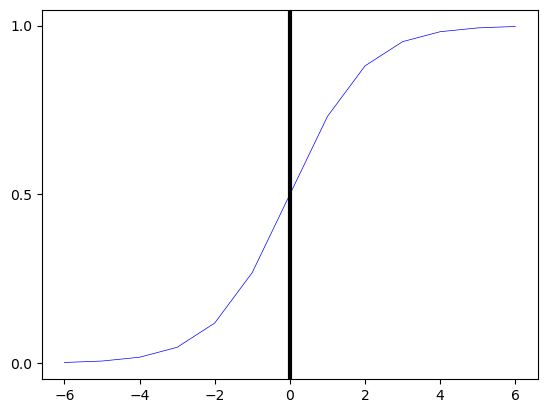

In [49]:
# 선 그래프 그리기
plt.plot(sigmoid_x , sigmoid_y, color = 'blue',linewidth = 0.5)
# 백 그라운드 모눈 종이 설정하기
plt.rcParams['axes.grid'] = True
# 라인 굵기 설정하기
plt.axvline(x=0, color='black', linewidth=3)
# y 축 범위 설정하기 
plt.yticks([0,0.5,1])
plt.show()

### 2) 로지스틱 회귀 실습하기

#### (1) 데이터 구성하기

In [50]:
# 학습 데이터 생성하기
x_train = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y_train = [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
# 추론을 위한 데이터 생성하기
x_test = [0,1,2,18,19]
y_test =  [0,0,0,1,1]

# 학습 데이터에 대해 numpy로 변경 및 행을 열로 변경하기
x_train = np.array(x_train).reshape([-1,1])
y_train = np.array(y_train)
# 추론 데이터에 대해 numpy로 변경 및 행을 열로 변경하기
x_test = np.array(x_test).reshape([-1,1])
y_test = np.array(y_test)

In [51]:
# 데이터 확인하기
print(x_train)
print(y_train)

[[ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


#### (2) 로지스틱 회귀 학습 하기

In [52]:
#로지스틱 회귀 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression

In [53]:
# 로지스틱 회귀 생성하기
logi_reg = LogisticRegression()

In [54]:
# 학습하기
logi_reg.fit(x_train, y_train)

LogisticRegression()

In [55]:
# 역산을 위한 기울기와 절편이 있는지 확인하기
print('intercept:', logi_reg.intercept_)
print('coef:', logi_reg.coef_)

intercept: [-11.34126808]
coef: [[1.19383367]]


#### (3) 로지스틱 회귀 그래프 만들기


In [56]:
# 기울기와 절편을 수동으로 결과 만들기
odd = [] # 
for i in x_train:
    odd.append((logi_reg.coef_* i) + logi_reg.intercept_)
    
sigmoid_y= sigmoid(np.array(odd))
sigmoid_y = sigmoid_y.reshape(-1,1)

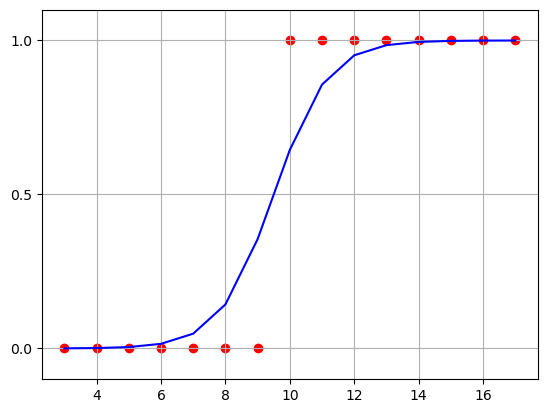

In [57]:
# 역산된 그래프 표시하기
plt.scatter(x_train, y_train,color='red')
plt.plot(np.array(x_train), sigmoid_y, color='blue')
plt.rcParams['axes.grid'] = True 
plt.yticks([0,0.5,1])
plt.ylim([-0.1, 1.1]) # y축의 범위: [Ymin, Ymax]     
plt.show()

### 3) 로지스틱 회귀와 선형회귀 비교하기

#### (1) 선형회귀 모델링하기

In [58]:
# 선형회귀 함수 불러오기
from sklearn.linear_model import LinearRegression
# 선형회귀 생성하기
lr = LinearRegression()
# 학습하기
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
# 수식 완성을 위한 coef 와 intercept 확인하기
print('intercept:', lr.intercept_)
print('coef:', lr.coef_)

intercept: -0.4666666666666669
coef: [0.1]


#### (2) 선형회귀 모델과 로지스틱 회귀 모델 비교하기

In [60]:
coef_intercept = x_train * lr.coef_ + lr.intercept_

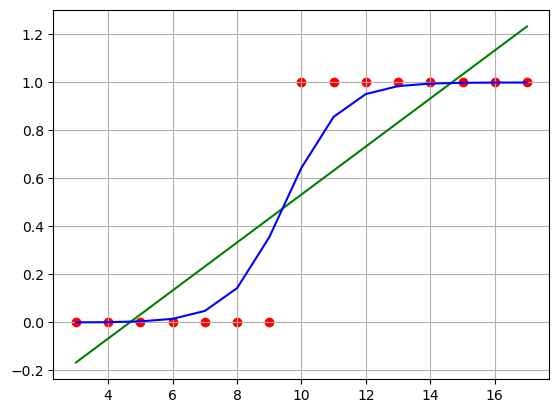

1.0
0.3981481481481476


In [61]:
plt.scatter(x_train, y_train,color='red')
plt.plot(np.array(x_train), coef_intercept, color='green')
plt.plot(np.array(x_train), sigmoid_y, color='blue')
plt.rcParams['axes.grid'] = True
plt.show()
print(logi_reg.score(x_test,y_test))
print(lr.score(x_test,y_test))

### [확인 문제]

In [62]:
# 문제 01. 정답 
logi_pred = logi_reg.predict(np.array(9.5).reshape(-1,1))
logi_pred

array([1])

In [63]:
lr_pred = lr.predict(np.array(9.5).reshape(-1,1))
round(lr_pred[0])

0

## 4. 의사결정나무(Decision tree)

### 2) 의사결정나무 실습하기

#### (1) 데이터 준비하기

In [64]:
# 라이브러리 불러오기 (numpy, pandas, train_test_split)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [65]:
# 데이터 불러오기
df = pd.read_csv("국민건강보험공단_건강검진정보_20211229.CSV", encoding = 'cp949')
# 트리 예시를 만들기 위해서 일부 특성만 추출
sample_df = df[['신장(5Cm단위)','성별코드', '체중(5Kg 단위)','음주여부']]

In [66]:
# 샘플 데이터 중 상위 10개 추출하기
sample_df[:10]

,신장(5Cm단위),성별코드,체중(5Kg 단위),음주여부
0,165,1,60,0.0
1,150,2,65,0.0
2,155,2,55,0.0
3,160,1,70,0.0
4,155,2,50,0.0
5,185,1,85,1.0
6,165,1,80,1.0
7,160,1,65,0.0
8,150,2,50,0.0
9,150,2,45,0.0


#### (2) 데이터 전처리하기

In [67]:
# info 정보로 결측치(Null) 확인하기
print("Info 정보 확인")
sample_df.info()

Info 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   신장(5Cm단위)   1000000 non-null  int64  
 1   성별코드        1000000 non-null  int64  
 2   체중(5Kg 단위)  1000000 non-null  int64  
 3   음주여부        999804 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 30.5 MB


In [68]:
# 100만개 데이터 중 결측치 196개, 결측치가 포함된 행 삭제하기
sample = sample_df.dropna() 

In [69]:
# 결측치(Null) 다시 확인하기
print("Drop 후 Info 정보 확인")
sample.info()

Drop 후 Info 정보 확인
<class 'pandas.core.frame.DataFrame'>
Int64Index: 999804 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   신장(5Cm단위)   999804 non-null  int64  
 1   성별코드        999804 non-null  int64  
 2   체중(5Kg 단위)  999804 non-null  int64  
 3   음주여부        999804 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


In [70]:
# 원-핫 인코딩을 위해 데이터를 object 형태로 변경하기
sample = sample.astype('str')

In [73]:
# label(결과, Y) 생성하기
y=sample.음주여부

In [74]:
# 음주 여부 학습 데이터 구성하기
X=sample.drop('음주여부', axis=1)

In [75]:
# label 데이터의 편향성 확인하기
y.value_counts()

1.0    584685
0.0    415119
Name: 음주여부, dtype: int64

In [76]:
# 학습/검증 데이터 분리하기
x_train, x_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,
    random_state=34
)

#### (3) 의사결정나무 모델링하기

In [79]:
# 의사결정나무 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

In [80]:
# 의사결정나무 모델 생성하기
dt = DecisionTreeClassifier(random_state = 1001, 
                            max_depth=2
                           ) 

In [81]:
# 의사결정나무 학습하기
dt_model = dt.fit(x_train, y_train)

In [82]:
# 학습 데이터 정확도 확인하기
print("학습 정확도 = ", dt_model.score(x_train, y_train))

학습 정확도 =  0.6622549675373792


In [83]:
# 검증 데이터 정확도 확인하기
print("검증 정확도 = ", dt_model.score(x_valid, y_valid))

검증 정확도 =  0.6618390586164302


#### (4) 의사결정나무 그래프 그리기

In [84]:
# 그래프 라이브러리(matplotlib.pyplot) 불러오기
import matplotlib.pyplot as plt

In [85]:
# 트리 모양 그래프 작성을 위한 라이브러리 설치하기
#!pip install graphviz

In [86]:
# 그래프 라이브러리(grphviz) 불러오기
import graphviz
# 사이킷런의 graphviz 지원 모듈 불러오기
from sklearn.tree import export_graphviz
# 그래프 생성하기
tree_graph = graphviz.Source(export_graphviz(dt_model,
                                class_names=["X","O"],
                                feature_names=[ 'height', 'sex','weight'],
                                impurity=True,
                                filled=True))

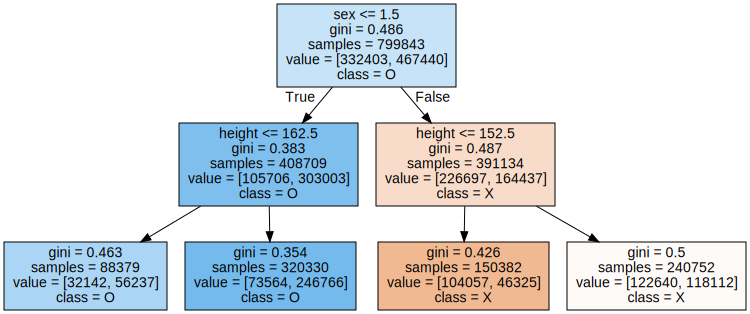

In [87]:
# 그래프 출력하기
# (참고) 에러 발생시 사이트 참조 : https://highschoolfree.tistory.com/76
tree_graph

In [88]:
# 그래프 파일 저장하기
tree_graph.render('tree_depth5', format="png")

'tree_depth5.png'

### 3) 불순도 알아보기

In [89]:
# 불순도 함수 생성하기
def gini(x):
    n = x.sum() 
    gini_sum = 0
    for key in x.keys():
        gini_sum = gini_sum  +  (x[key] / n ) * (x[key] / n )
    gini = 1 - gini_sum
    return gini

In [90]:
# 데이터 준비하기(불순도 예시)
과일바구니1 = ['사과']*9
과일바구니2 = ['사과', '바나나','사과', '바나나','바나나','바나나', '복숭아','복숭아','복숭아']
과일바구니3 = ['사과', '바나나','사과', '바나나','사과','복숭아', '복숭아','사과','복숭아']

In [91]:
print(round(gini(pd.DataFrame(과일바구니1).value_counts()),3))
print(round(gini(pd.DataFrame(과일바구니2).value_counts()),3))
print(round(gini(pd.DataFrame(과일바구니3).value_counts()),3))

0.0
0.642
0.642


### [확인 문제]

#### 1. 앞에서 활용했던 데이터를 이용하여 max_depth 파라미터를 1,15,30으로 각각의 모델을 만들어 보고 validation Score가 가장 작은 max_depth 수치를 작성하시오.(단, random_state는 1001 고정)


In [92]:
#for 문제 직접 리스트를 넣어서 구현하기
for depth in [1,15,30]:
    dt = DecisionTreeClassifier(random_state = 1001, 
                            max_depth=depth,
                           ) 
    dt_model = dt.fit(x_train, y_train)
    print(f'''max_depth {depth}일때 train 정확도{dt_model.score(x_train, y_train):.2f}, validation 정확도{dt_model.score(x_valid, y_valid):.2f}''')

max_depth 1일때 train 정확도0.66, validation 정확도0.66
max_depth 15일때 train 정확도0.68, validation 정확도0.68
max_depth 30일때 train 정확도0.68, validation 정확도0.68


#### 2. max_feature 파라미터를 1,2,3으로 각각 모델을 만들고 validation Score가 가장 높은 max_feature를 작성하세요. (단, random_state는 1001로 고정하고, max_depth에 대해 앞에서 가장 작은 max_depth 고정 후 결과 산출)

In [93]:
# 리스트를 별도로 만들어서 max_feature 변경하고 결과 산출
repeat_list = [1,2,3]
for feature in repeat_list:
    dt = DecisionTreeClassifier(random_state = 1001,
                                max_depth=1,
                                max_features = feature,
                           )
    dt_model = dt.fit(x_train, y_train)
    print(f'''max_feature {feature}일때 train 정확도{dt_model.score(x_train, y_train):.2f}, validation 정확도{dt_model.score(x_valid, y_valid):.2f}''')

max_feature 1일때 train 정확도0.67, validation 정확도0.67
max_feature 2일때 train 정확도0.66, validation 정확도0.66
max_feature 3일때 train 정확도0.66, validation 정확도0.66


## 6. 랜덤포레스트(Random Forest)

### 2) 랜덤포레스트 실습하기

#### (1) 데이터 준비하기

In [94]:
# tensorflow 라이브러리 설치하기
#!pip install tensorflow --user

In [95]:
# tensorflow에서 제공하는 데이터셋 mnist 불러오기
from tensorflow.keras.datasets.mnist import load_data

In [96]:
# load_data로 데이터 할당하기
(x_train, y_train), (x_test, y_test) = load_data()

In [97]:
# 손 글씨 데이터는 이미지라 3차원 행렬
print("변경 전 = ",x_train.shape)

변경 전 =  (60000, 28, 28)


In [98]:
# 3차원 행렬을 2차원으로 변경하기
X_train = x_train.reshape(-1, 784) 
X_test = x_test.reshape(-1, 784)

In [99]:
# 변경 결과 확인하기
print("변경 후 = ",X_train.shape)

변경 후 =  (60000, 784)


#### (2) 의사결정나무 모델링하기

In [100]:
# 필요 라이브러리 불러오기(의사결정나무, 랜덤포레스트)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
# 의사결정나무 학습하기
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [102]:
# 의사결정나무 결과확인하기
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)

In [103]:
print(f'''학습결과 = {acc_train_dct},검증결과 = {acc_test_dct} ''')

학습결과 = 1.0,검증결과 = 0.8781 


#### (3) 랜덤포레스트 모델링 및 결과 비교하기

In [104]:
# 랜덤포레스트 학습하기
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [105]:
# 랜덤포레스트 결과 보기
acc_train_rfc = rfc.score(X_train,y_train)
acc_test_rfc = rfc.score(X_test,y_test)

In [106]:
# 학습 결과 수치로 출력하기
print(f"""의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")
print(f"""랜덤포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}""")

의사결정나무: train_acc = 1.0, test_acc = 0.878
랜덤포레스트: train_acc = 1.0, test_acc = 0.97


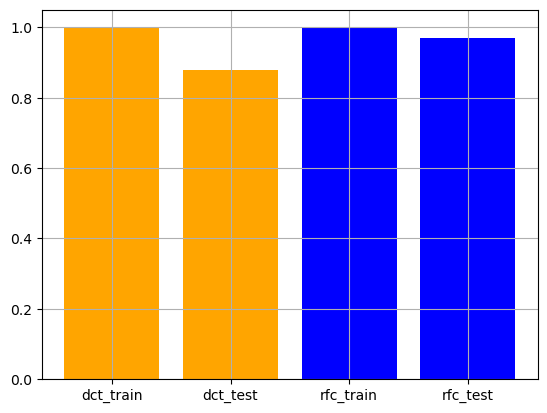

In [107]:
# 랜덤포레스트 결과를 토대로 비교 그래프 그리기
import matplotlib.pyplot as plt
# x 축 정의하기
acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test']
# y 축 정의
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc]
# 막대그래프 차트 색 정의하기
colors = ['orange', 'orange' , 'blue', 'blue']
# 막대그래프 설정하기
plt.bar(acc_list_x, acc_list_y, color=colors)
# 화면 출력하기
plt.show()

### 3) 랜덤포레스트와 의사결정나무 비교하기

In [108]:
# 의사결정나무 결과와 동일하게 랜덤포레스트 구성하기
rft = RandomForestClassifier(
    random_state=0, 
    # 나무 개수를 1개로 설정하기
    n_estimators=1,
    # max_feature는 의사결정나무 기준으로 변경하기
    max_features=None,
    # 부트스트랩 샘플링은 OFF하기
    bootstrap=False,
)
rft.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=None, n_estimators=1,
                       random_state=0)

In [109]:
# 학습 결과 저장하기
acc_train_rfc = rft.score(X_train,y_train)
acc_test_rfc = rft.score(X_test,y_test)
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)

In [110]:
#의사결정나무 & 랜덤포레스트가 유사한 결과를 출력하는지 비교하기
print(f"""의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")
print(f"""랜덤포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}""")

의사결정나무: train_acc = 1.0, test_acc = 0.878
랜덤포레스트: train_acc = 1.0, test_acc = 0.877


### [확인 문제]

#### 1. Max_features 의 값을 40, 50, 60 으로 변경해보고 가장 좋은 결과값을 작성 하세요. (단, random_state는 0으로 고정)

In [111]:
max_features = [40,50,60]
for max_feature in max_features:
    print(max_feature)
    rfc = RandomForestClassifier(max_features = max_feature,
                                 n_jobs= -1, 
                                 random_state = 0)
    rfc.fit(X_train, y_train)
    acc_train_dct = rfc.score(X_train,y_train)
    acc_test_dct = rfc.score(X_test,y_test)
    print(f"""max_features {max_feature}일 때 train_acc ={round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")

40
max_features 40일 때 train_acc =1.0, test_acc = 0.97
50
max_features 50일 때 train_acc =1.0, test_acc = 0.971
60
max_features 60일 때 train_acc =1.0, test_acc = 0.97


## 7. 그라디언트 부스팅 (gradient boosting)

### 2) 그라디언트 부스팅 실습하기

#### (1) 데이터 준비하기

In [112]:
# tensorflow에서 데이터 불러오기
from tensorflow.keras.datasets.mnist import load_data
# 그래프 라이브러리 불러오기
import matplotlib.pyplot as plt

In [113]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = load_data()

# 학습시간 고려해서 2000건 데이터만 사용하기
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:2000]
y_test = y_test[:2000]

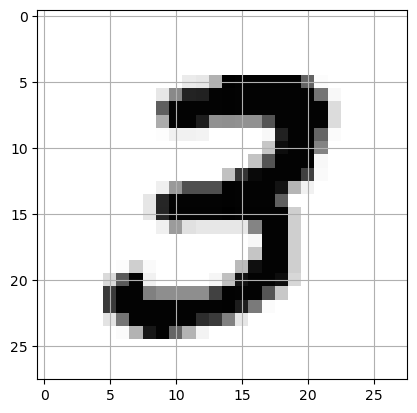

In [114]:
# 샘플 데이터 확인하기
plt.imshow(x_train[7], cmap='Greys')
plt.show()

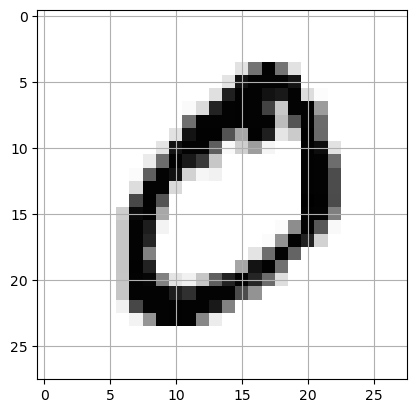

In [115]:
# 샘플 데이터 확인하기
plt.imshow(x_train[1], cmap='Greys')
plt.show()

In [116]:
# 학습을 위한 2차원 행렬로 변경하기
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)

#### (2) 알고리즘 별 학습 및 결과 비교하기

In [117]:
# 의사결정나무, 랜덤포레스트, 그라디언트부스팅 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
# 의사결정나무 불러오기 및 학습하기
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [119]:
# 의사결정나무 학습 결과 저장하기
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)

In [120]:
# 랜덤포레스트 불러오기 및 학습하기
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [121]:
# 랜덤포레스트 학습 결과 저장하기
acc_train_rfc = rfc.score(X_train,y_train)
acc_test_rfc = rfc.score(X_test,y_test)

In [122]:
# 그라디언트부스팅 불러오기 및 학습하기
gbc = GradientBoostingClassifier(random_state=0, verbose=1)
gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.8398            3.15m
         2           1.5879            3.12m
         3           1.4024            3.13m
         4           1.2584            3.17m
         5           1.1338            3.05m
         6           1.0258            2.92m
         7           0.9359            2.84m
         8           0.8556            2.79m
         9           0.7863            2.71m
        10           0.7247            2.69m
        20           0.3653            2.50m
        30           0.2167            2.22m
        40           0.1423            1.93m
        50           0.0982            1.63m
        60           0.0720            1.31m
        70           0.0540           58.68s
        80           0.0410           39.18s
        90           0.0321           19.61s
       100           0.0252            0.00s


GradientBoostingClassifier(random_state=0, verbose=1)

In [123]:
# 그라디언트부스팅 학습 결과 저장하기
acc_train_gbc = gbc.score(X_train,y_train)
acc_test_gbc = gbc.score(X_test,y_test)

In [124]:
# 각 알고리즘별 성능 비교하기
print(f"""의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")
print(f"""랜덤포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}""")
print(f"""그라디언트부스팅: train_acc = {round(acc_train_gbc,3)}, test_acc = {round(acc_test_gbc,3)}""")

의사결정나무: train_acc = 1.0, test_acc = 0.652
랜덤포레스트: train_acc = 1.0, test_acc = 0.874
그라디언트부스팅: train_acc = 1.0, test_acc = 0.828


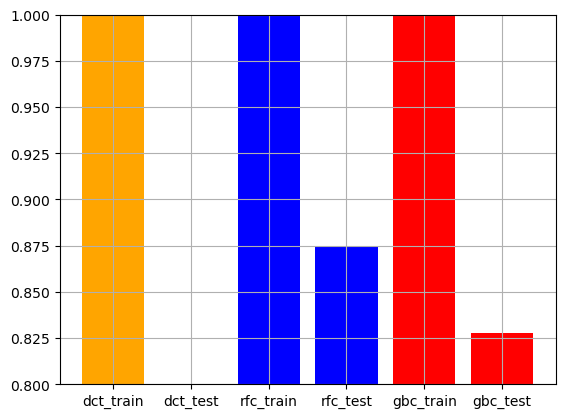

In [125]:
# 비교 그래프 그리기
import matplotlib.pyplot as plt
acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test', 'gbc_train', 'gbc_test', ]
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc, acc_train_gbc, acc_test_gbc]
colors = ['orange', 'orange' , 'blue', 'blue', 'red', 'red']
plt.bar(acc_list_x,acc_list_y, color=colors)
plt.ylim([0.8,1.0])
plt.show()

### [확인 문제]

#### 1. 그래디언트 부스팅 알고리즘으로 n_estimator를 200으로 설정(기본값은 100)하여 학습시켜 보고 기존 그래디언트 부스팅 결과와 비교하는 그래프 코드를 작성하세요.

In [126]:
# 그라디언트부스팅 불러오기 및 학습하기
gbc_200 = GradientBoostingClassifier(random_state=0, 
                                 n_estimators=200,
                                verbose=1)
gbc_200.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.8398            7.24m
         2           1.5879            7.37m
         3           1.4024            7.17m
         4           1.2584            7.30m
         5           1.1338            7.24m
         6           1.0258            7.21m
         7           0.9359            7.08m
         8           0.8556            6.91m
         9           0.7863            6.80m
        10           0.7247            6.69m
        20           0.3653            6.06m
        30           0.2167            5.73m
        40           0.1423            5.40m
        50           0.0982            5.07m
        60           0.0720            4.70m
        70           0.0540            4.36m
        80           0.0410            4.04m
        90           0.0321            3.69m
       100           0.0252            3.36m
       200           0.0024            0.00s


GradientBoostingClassifier(n_estimators=200, random_state=0, verbose=1)

In [127]:
# 그라디언트부스팅 학습 결과 다시 저장하기
acc_train_gbc_200 = gbc_200.score(X_train,y_train)
acc_test_gbc_200 = gbc_200.score(X_test,y_test)

In [128]:
print(f"""그라디언트부스팅: train_acc = {round(acc_train_gbc,3)}, test_acc = {round(acc_test_gbc,3)}""")
print(f"""튜닝 그라디언트부스팅: train_acc = {round(acc_train_gbc_200,3)}, test_acc = {round(acc_test_gbc_200,3)}""")

그라디언트부스팅: train_acc = 1.0, test_acc = 0.828
튜닝 그라디언트부스팅: train_acc = 1.0, test_acc = 0.844


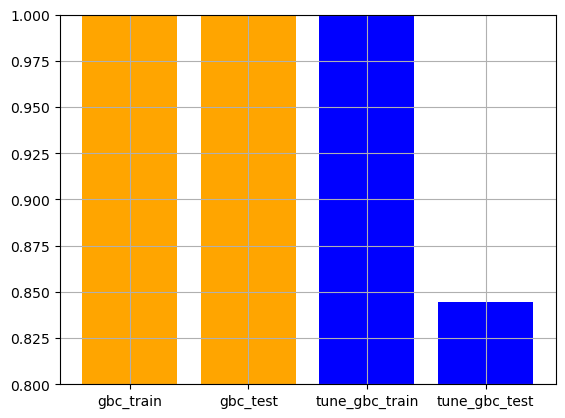

In [129]:
import matplotlib.pyplot as plt
acc_list_x = ['gbc_train', 'gbc_test', 'tune_gbc_train', 'tune_gbc_test', ]
acc_list_y = [acc_train_gbc, acc_train_gbc, acc_train_gbc_200, acc_test_gbc_200]
colors = ['orange', 'orange' , 'blue', 'blue']
plt.bar(acc_list_x,acc_list_y, color=colors)
plt.ylim([0.8,1.0])
plt.show()